<a href="https://colab.research.google.com/github/AlexeyProvorov/Templates/blob/main/tf_Keras(func_aproach)_NN_and_VAE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пример использования tf функционального подхода. С передечей атрибутов экземплярам через `__call__`


1) Полносвязная нейронная сеть
2) Автоэнкодер

# Полносвязная нейронная сеть

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
input = keras.Input(shape=(32,32,3))

x = layers.Conv2D(32, 3, activation = 'relu')(input)
x = layers.MaxPooling2D(2, padding = 'same')(x)

x = layers.Conv2D(64, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2, padding = 'same')(x)

x = layers.Flatten()(x)

x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs = input, outputs = output)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0   

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 66s 104ms/step - loss: 1.5825 - accuracy: 0.4245 - val_loss: 1.2858 - val_accuracy: 0.5488
Epoch 2/20
625/625 [==============================] - 59s 94ms/step - loss: 1.2516 - accuracy: 0.5546 - val_loss: 1.1075 - val_accuracy: 0.6099
Epoch 3/20
625/625 [==============================] - 59s 94ms/step - loss: 1.1184 - accuracy: 0.6035 - val_loss: 1.0059 - val_accuracy: 0.6482
Epoch 4/20
625/625 [==============================] - 58s 93ms/step - loss: 1.0202 - accuracy: 0.6411 - val_loss: 0.9508 - val_accuracy: 0.6667
Epoch 5/20
625/625 [==============================] - 57s 91ms/step - loss: 0.9383 - accuracy: 0.6718 - val_loss: 0.9071 - val_accuracy: 0.6823
Epoch 6/20
625/625 [==============================] - 59s 94ms/step - loss: 0.8810 - accuracy: 0.6889 - val_loss: 0.8983 - val_accuracy: 0.6885
Epoch 7/20
625/625 [==============================] - 59s 95ms/step - loss: 0.8234 - accuracy: 0.7095 - val_loss: 0.8639 - val_accuracy

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 4s 14ms/step - loss: 0.9808 - accuracy: 0.7213
[0.9807549118995667, 0.7213000059127808]


# Автоэнкодер

1/1 [==============================] - 0s 137ms/step


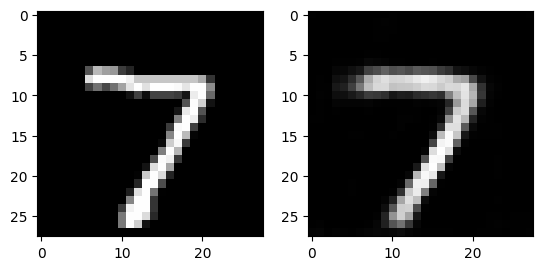

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist

import matplotlib.pyplot as plt

enc_input = Input(shape=(28, 28, 1))
x = Conv2D(32, 3, activation='relu')(enc_input)
x = MaxPooling2D(2, padding='same')(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2, padding='same')(x)
x = Flatten()(x)
enc_output = Dense(8, activation='linear')(x)

encoder = keras.Model(enc_input, enc_output, name="encoder")

dec_input = keras.Input(shape=(8,), name="encoded_img")
x = Dense(7 * 7 * 8, activation='relu')(dec_input)
x = keras.layers.Reshape((7, 7, 8))(x)
x = Conv2DTranspose(64, 5, strides=(2, 2), activation="relu", padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = Conv2DTranspose(32, 5, strides=(2, 2), activation="linear", padding='same')(x)
x = keras.layers.BatchNormalization()(x)
dec_output = Conv2DTranspose(1, 3, activation="sigmoid", padding='same')(x)

decoder = keras.Model(dec_input, dec_output, name="decoder")

autoencoder_input = Input(shape=(28, 28, 1), name="img")
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder = keras.Model(autoencoder_input, autoencoder_output, name="autoencoder")
#autoencoder.summary()


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, batch_size=32, epochs=1)

h = encoder.predict(tf.expand_dims(x_test[0], axis=0))
img = decoder.predict(h)

plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.subplot(122)
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

исходник взят от(11 видео по TF у Балакирева)